In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Activation, concatenate
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料前處理

In [2]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [3]:
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

In [4]:
x_train1 = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test1 = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [5]:
y_train = np_utils.to_categorical(y_train0,10)
y_test = np_utils.to_categorical(y_test0,10)

# 神經網路架構圖
Activation Function 皆採用Relu,並搭配Adam作為優化器

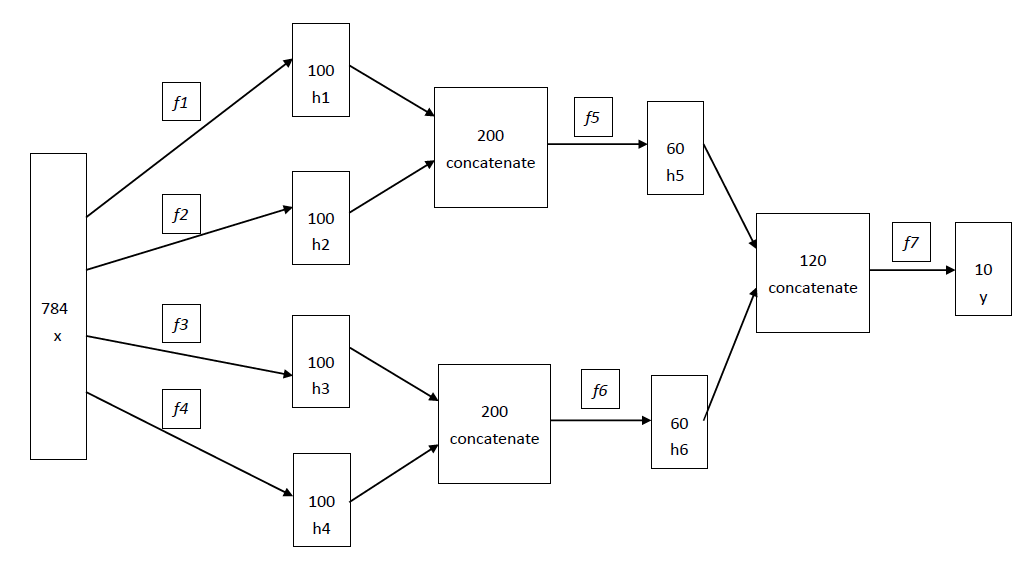

# Function Definition

In [6]:
x = Input(shape=(784,))

In [7]:
f1 = Dense(100, activation='relu')
f2 = Dense(100, activation='relu')
f3 = Dense(100, activation='relu')
f4 = Dense(100, activation='relu')
f5 = Dense(80, activation='relu')
f6 = Dense(80, activation='relu')
f7 = Dense(10, activation='softmax')

In [8]:
h1 = f1(x)
h2 = f2(x)
h3 = f3(x)
h4 = f4(x)
h5 = f5(concatenate([h1,h2]))
h6 = f6(concatenate([h3,h4]))
y = f7(concatenate([h5,h6]))

In [9]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [10]:
model.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])

# Train model  

In [11]:
Model1 = model.fit(x_train1,y_train,batch_size=128,epochs=30,verbose =1,validation_data = (x_test1,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 130us/step - loss: 0.0119 - acc: 0.9238 - val_loss: 0.0067 - val_acc: 0.9564
Epoch 2/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.0051 - acc: 0.9674 - val_loss: 0.0053 - val_acc: 0.9648
Epoch 3/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.0037 - acc: 0.9769 - val_loss: 0.0041 - val_acc: 0.9731
Epoch 4/30
60000/60000 [==============================] - 6s 107us/step - loss: 0.0027 - acc: 0.9832 - val_loss: 0.0034 - val_acc: 0.9778
Epoch 5/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.0022 - acc: 0.9866 - val_loss: 0.0033 - val_acc: 0.9781
Epoch 6/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.0018 - acc: 0.9893 - val_loss: 0.0029 - val_acc: 0.9799
Epoch 7/30
60000/60000 [==============================] - 7s 110us/step - loss: 0.0015 - acc: 0.9911 - val_loss: 0.0032 - 

# Plot train_accurancy v.s. valid_accuracny & train_loss v.s. valid_loss

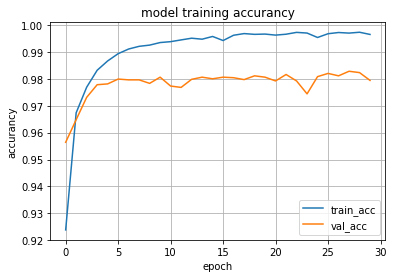

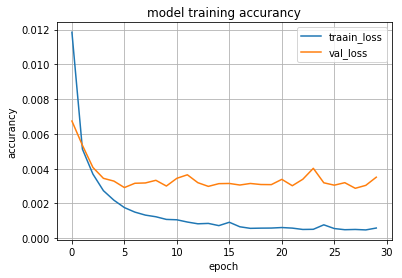

In [12]:
plt.plot(Model1.history['acc'])
plt.plot(Model1.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(Model1.history['loss'])
plt.plot(Model1.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# Generate Confusion Matrix

In [14]:
y_predict = model.predict(x_test1)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 972,    1,    0,    0,    0,    2,    2,    1,    2,    0],
       [   0, 1129,    1,    1,    0,    1,    2,    0,    1,    0],
       [   5,    2,  983,   20,    2,    0,    2,    8,    9,    1],
       [   0,    0,    1,  996,    0,    5,    0,    3,    2,    3],
       [   0,    0,    3,    1,  959,    2,    2,    2,    1,   12],
       [   2,    0,    0,    6,    1,  877,    1,    1,    2,    2],
       [   3,    2,    0,    0,    8,    9,  933,    0,    3,    0],
       [   1,    3,    4,    2,    1,    0,    0, 1004,    2,   11],
       [   2,    1,    1,   10,    3,    6,    0,    1,  944,    6],
       [   2,    2,    0,    0,    5,    3,    0,    0,    0,  997]],
      dtype=int64)

# Model accurancy

In [15]:
score = model.evaluate(x_test,y_test)
print(f'model loss:{score[0]}, accurancy:{score[1]}')

10000/10000 [==============================] - 1s 66us/step
model loss:0.004313616839357999, accurancy:0.9784
